# Time Series EDA

## In this lesson we will discuss multiple different visualizations for exploring time series data. The primary use case for Time Series EDA techniques is when we have a single continuous variable sampled over time and we want to identify trend and seasonality.



## Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

In [1]:
import prepare

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('joined_df.csv',index_col=0)

In [2]:
df.sale_date = df.sale_date.apply(lambda x: x[:-13])

In [3]:
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,"Fri, 04 Jan 2013",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,"Sat, 05 Jan 2013",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [4]:
df = prepare.set_index(df, 'sale_date')

In [7]:
df = prepare.create_date_columns(df, ['year','month','weekday'],'index')

In [8]:
df['total_price'] = df.sale_amount * df.item_price

In [9]:
df.head()


,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,year,month,weekday,total_price
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,1,10.92
2013-01-01,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,2013,1,1,218.40
2013-01-01,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,2013,1,1,125.55
2013-01-01,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,2013,1,1,453.60
2013-01-01,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,2013,1,1,294.00


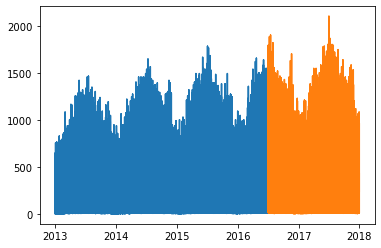

In [10]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.total_price)
plt.plot(test.total_price)

<AxesSubplot:xlabel='month'>

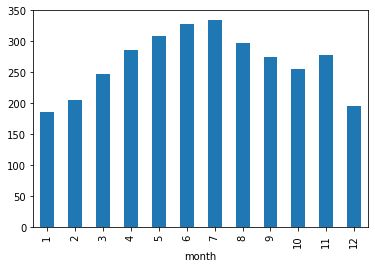

In [11]:

train.groupby('month').total_price.mean().plot.bar()

array([[<AxesSubplot:title={'center':'total_price'}>]], dtype=object)

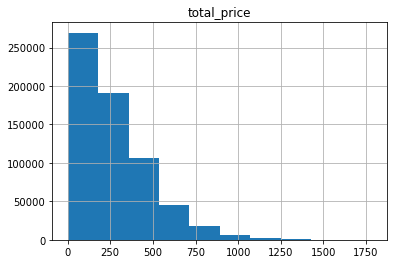

In [12]:

train[['total_price']].hist()

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'weekday'}>, <AxesSubplot:>]],
      dtype=object)

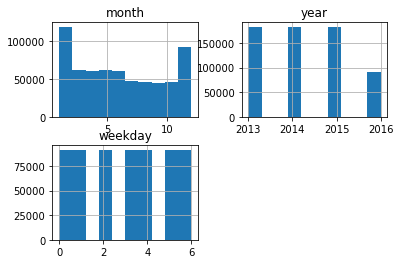

In [13]:
train[['month','year','weekday']].hist()

<AxesSubplot:xlabel='weekday', ylabel='total_price'>

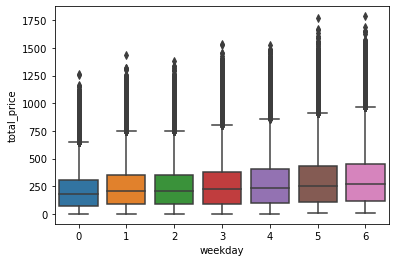

In [14]:
sns.boxplot(data=train, y='total_price',x='weekday')

<AxesSubplot:xlabel='sale_date'>

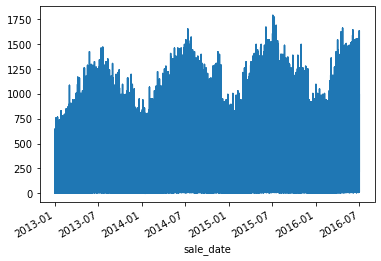

In [15]:

train['total_price'].plot()

In [16]:
y = train[['total_price']]

<AxesSubplot:title={'center':'Monthly Aggregates'}, xlabel='sale_date'>

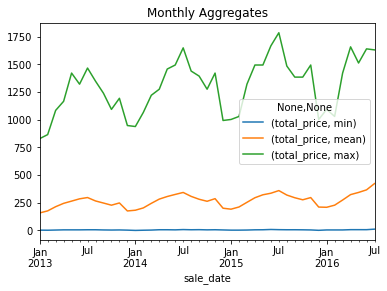

In [17]:

y.resample('M').agg(['min','mean','max']).plot(title='Monthly Aggregates')

<AxesSubplot:title={'center':'Average week-to-week change in total price'}, xlabel='sale_date'>

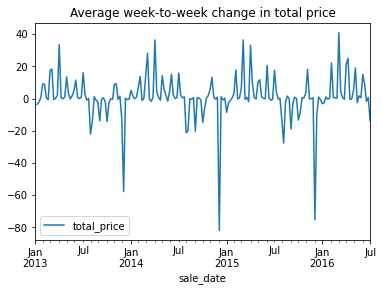

In [18]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in total price')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

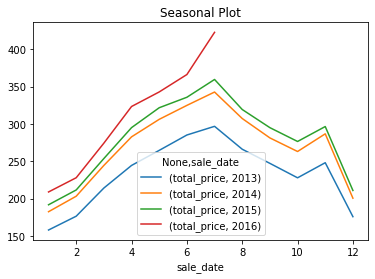

In [19]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

<AxesSubplot:title={'center':'Monthly Aggregates'}, xlabel='sale_date'>

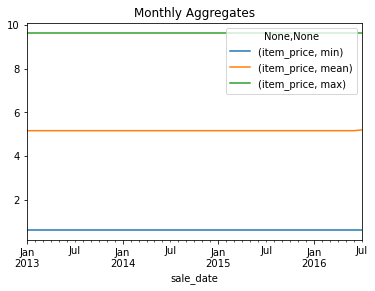

In [20]:
train[['item_price']].resample('M').agg(['min','mean','max']).plot(title='Monthly Aggregates')

<AxesSubplot:title={'center':'Monthly Aggregates'}, xlabel='sale_date'>

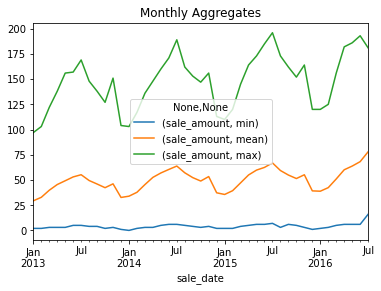

In [21]:
train[['sale_amount']].resample('M').agg(['min','mean','max']).plot(title='Monthly Aggregates')

<AxesSubplot:xlabel='sale_date'>

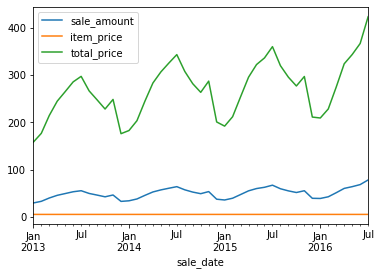

In [22]:
train[['sale_amount','item_price','total_price']].resample('M').mean().plot()

<AxesSubplot:xlabel='sale_date'>

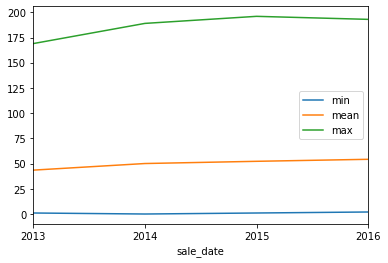

In [23]:
train['sale_amount'].resample('Y').agg(['min','mean','max']).plot()

<AxesSubplot:xlabel='sale_date'>

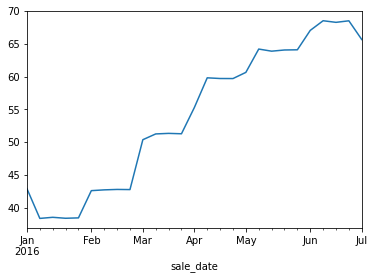

In [24]:
train[train.year==2016].sale_amount.resample('W').mean().plot()

<AxesSubplot:xlabel='sale_date'>

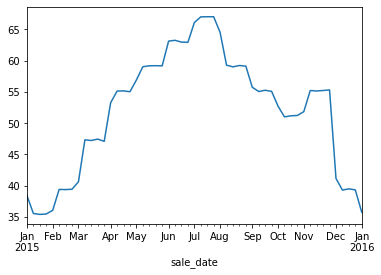

In [25]:
train[train.year==2015].sale_amount.resample('W').mean().plot()

In [26]:
df_op = pd.read_csv('open_power_df.csv', index_col=0)

In [27]:
df_op.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [28]:
df_op = prepare.set_index(df_op, 'Date')

In [29]:
df_op.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [30]:
df_op = df_op.fillna(0)

In [31]:
df_op.head()


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0


In [33]:
df_op = prepare.create_date_columns(df_op, ['year','month','weekday'],'index')

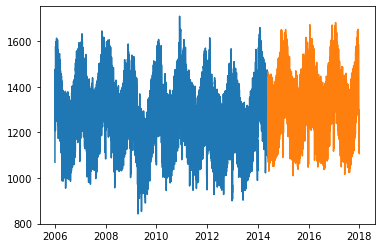

In [34]:
train_size = .70
n = df_op.shape[0]
test_start_index = round(train_size * n)

train = df_op[:test_start_index] # everything up (not including) to the test_start_index
test = df_op[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.Consumption)
plt.plot(test.Consumption)

<AxesSubplot:xlabel='month'>

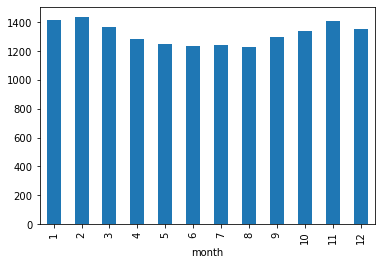

In [36]:
train.groupby('month').Consumption.mean().plot.bar()

array([[<AxesSubplot:title={'center':'Consumption'}>]], dtype=object)

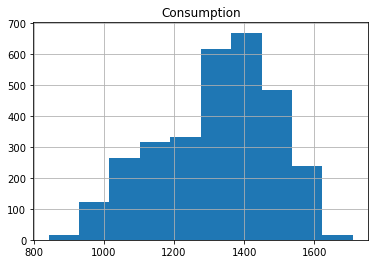

In [37]:
train[['Consumption']].hist()

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'weekday'}>, <AxesSubplot:>]],
      dtype=object)

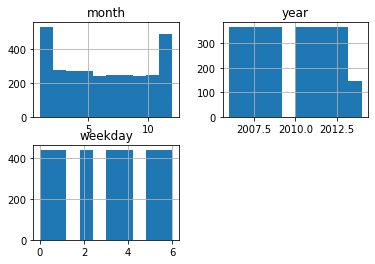

In [38]:
train[['month','year','weekday']].hist()

<AxesSubplot:xlabel='weekday', ylabel='Consumption'>

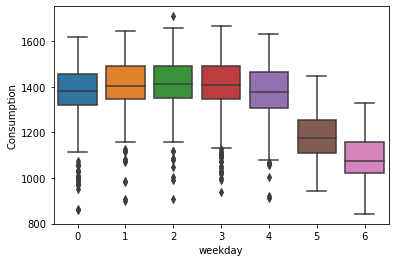

In [39]:
sns.boxplot(data=train, y='Consumption',x='weekday')

<AxesSubplot:xlabel='Date'>

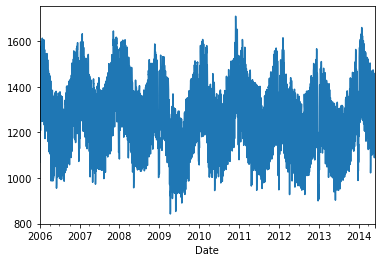

In [40]:
train['Consumption'].plot()

In [41]:
y = train[['Consumption']]

<AxesSubplot:title={'center':'Monthly Aggregates'}, xlabel='Date'>

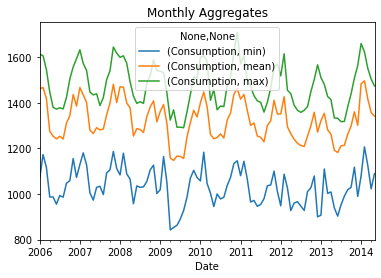

In [42]:
y.resample('M').agg(['min','mean','max']).plot(title='Monthly Aggregates')

<AxesSubplot:xlabel='Date'>

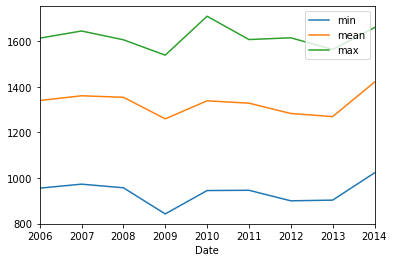

In [43]:
train['Consumption'].resample('Y').agg(['min','mean','max']).plot()

<AxesSubplot:title={'center':'Average week-to-week change in consumption'}, xlabel='Date'>

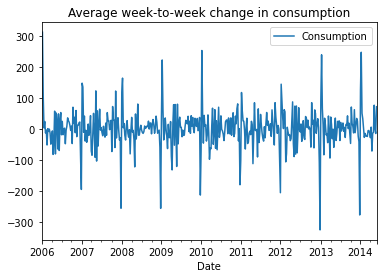

In [44]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in consumption')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

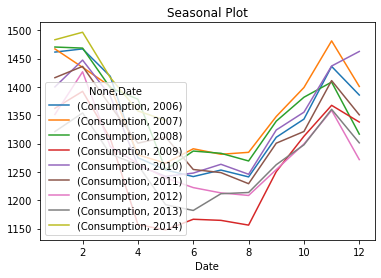

In [45]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

In [49]:
df_op

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday
Date,,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,2006,1,6
2006-01-02,1380.52100,0.000,0.000,0.000,2006,1,0
2006-01-03,1442.53300,0.000,0.000,0.000,2006,1,1
2006-01-04,1457.21700,0.000,0.000,0.000,2006,1,2
2006-01-05,1477.13100,0.000,0.000,0.000,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


<AxesSubplot:xlabel='Date'>

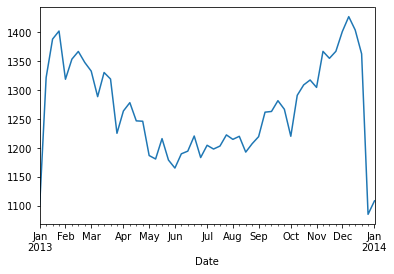

In [56]:
train[train.year==2013].Consumption.resample('W').mean().plot()

<AxesSubplot:xlabel='Date'>

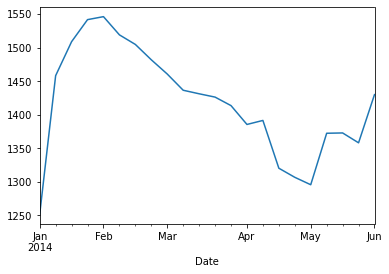

In [57]:
train[train.year==2014].Consumption.resample('W').mean().plot()